In [95]:
import subprocess
import math
import os
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

In [20]:
def read_density_file(file_name):
    with open(file_name, 'r') as file:
        data_lines = file.readlines()
        
        print(f"File {file_name} read successfully with {len(data_lines)} lines.")
        print("Original data lines:")
        for line in data_lines:
            print(line.strip())
        
        # Skip lines until we find the relevant data
        data_lines = [line for line in data_lines if "phase concentration:" in line.lower()]
        
        print(f"Filtered data lines: {len(data_lines)}")
        for line in data_lines:
            print(line.strip())
        
        if len(data_lines) < 2:
            print(f"Error: Expected at least 2 data lines in {file_name}, but got {len(data_lines)}.")
            return None, None, None, None
        
        # Extract values
        dense_line = data_lines[0].split()
        dilute_line = data_lines[1].split()

        dense = float(dense_line[3])
        dense_stdev = float(dense_line[5])
        dilute = float(dilute_line[3])
        dilute_stdev = float(dilute_line[5])
        
    return dense, dense_stdev, dilute, dilute_stdev

In [10]:
test_ct_files = [
"simulation/runs/I0FUN3_MACMU_Wildtype_2024_08_17_12_08_1723897245/270/densities_chunked2.dat_concentrations.txt"
]
    

In [4]:
subprocess.run(["python", "da.py", "densities_chunked2.dat"],
                                   cwd=test_ct_files[0],
                                   capture_output=True)

CompletedProcess(args=['python', 'da.py', 'densities_chunked2.dat'], returncode=0, stdout=b'', stderr=b'/home/ubuntu/CTP/simulation/runs/I0FUN3_MACMU_Wildtype_2024_08_17_12_08_1723897245/270/da.py:64: OptimizeWarning: Covariance of the parameters could not be estimated\n  popt, _ = curve_fit(super_gaussian, coords, avg_profile, p0=initial_guess, maxfev=20000)\n')

In [ ]:
r = subprocess.run(["python", "da.py", "densities_chunked2.dat"],
                       cwd=temp_dir,
                       capture_output=True)

In [12]:
dense, dense_stdev, dilute, dilute_stdev = read_density_file(test_ct_files[0])

File simulation/runs/I0FUN3_MACMU_Wildtype_2024_08_17_12_08_1723897245/270/densities_chunked2.dat_concentrations.txt read successfully with 2 lines.
Original data lines:
Dense phase concentration: 0.43277412578571434 +/- 0.36583179306206365
Dilute phase concentration: 0.0 +/- 0.0
Filtered data lines: 2
Dense phase concentration: 0.43277412578571434 +/- 0.36583179306206365
Dilute phase concentration: 0.0 +/- 0.0


In [17]:
abs(dense)

0.43277412578571434

In [44]:
def is_critical(conc_file_name, split_diff=0.1):
    dense, dense_stdev, dilute, dilute_stdev = read_density_file(conc_file_name)
    if abs(dense - dilute) < split_diff:
        return True
    else:
        return False

In [ ]:
data_test = {}
simulation_root_dir = "simulation/runs"
for seq_name in next(os.walk(simulation_root_dir))[1]:
    data_test[seq_name] = []
    for temp in next(os.walk(os.path.join(simulation_root_dir, seq_name)))[1]:
        if temp != "ps_densities":
            r = subprocess.run(["python", "da.py", "densities_chunked2.dat"],
                       cwd=os.path.join(simulation_root_dir,seq_name, temp),
                       capture_output=True)
            if os.path.exists(os.path.join(simulation_root_dir,seq_name, temp, 'densities_chunked2.dat_concentrations.txt')):
                #print("1")
                data_test[seq_name].append((temp, is_critical(os.path.join(simulation_root_dir, seq_name, temp, 'densities_chunked2.dat_concentrations.txt'))))
                data_test[seq_name] = sorted(data_test[seq_name], key=lambda x: x[0])

In [31]:
os.path.exists(os.path.join(simulation_root_dir, seq_name, temp, 'densities_chunked2.dat_concentrations.txt'))

False

In [52]:
for k in sorted(data_test.keys()):
    print(k)
    print(data_test[k])

.ipynb_checkpoints
[]
AVPGVG_2024_08_15_09_08_1723713769
[('250', True), ('270', True), ('290', True), ('300', True), ('307', True), ('314', True), ('321', True), ('328', True), ('335', True), ('342', True), ('349', True), ('356', True), ('363', True), ('370', True)]
CEP3_HHV11_P04289_Wildtype_2024_08_11_12_08_1723378473
[('180', False), ('190', False), ('200', False), ('210', False), ('220', False)]
CHKB_Q9Y259_Wildtype_2024_08_16_03_08_1723779555
[('250', True), ('270', True), ('290', True), ('300', True), ('307', True), ('314', True), ('321', True), ('328', True), ('335', True), ('342', True), ('349', True), ('356', True), ('363', True), ('370', True)]
CLPT1_O96005_Wildtype_2024_08_16_23_08_1723851984
[('250', False), ('270', True), ('290', True), ('300', True), ('307', True), ('314', True), ('321', True), ('328', True), ('335', True), ('342', True), ('349', True), ('356', True), ('363', True), ('370', True)]
CTDP1_Q9Y5B0_Wildtype_2024_08_15_15_08_1723735315
[('250', True), ('270', 

In [51]:
 sorted(data_test.keys())

['.ipynb_checkpoints',
 'AVPGVG_2024_08_15_09_08_1723713769',
 'CEP3_HHV11_P04289_Wildtype_2024_08_11_12_08_1723378473',
 'CHKB_Q9Y259_Wildtype_2024_08_16_03_08_1723779555',
 'CLPT1_O96005_Wildtype_2024_08_16_23_08_1723851984',
 'CTDP1_Q9Y5B0_Wildtype_2024_08_15_15_08_1723735315',
 'CX05A_A0A1B0GTR3_Wildtype_2024_08_19_10_08_1724062698',
 'DAXX_Q9UER7_2024_08_16_07_08_1723792023',
 'ENO4_A6NNW6_Wildtype_2024_08_16_01_08_1723772916',
 'EWSR1_-10G+10T_2024_08_06_12_08_1722948037',
 'FARP1_Q9Y4F1_Wildtype_2024_08_16_02_08_1723776122',
 'GAG_-5S+5T_2024_08_12_00_08_1723423704',
 'GAG_-5T+5G_2024_08_12_12_08_1723464030',
 'GAG_HV1H2_P04591_Wildtype_2024_08_16_05_08_1723787185',
 'GAL3B_A0A0B4J2D5_Wildtype_2024_08_16_00_08_1723769869',
 'GKAP1_Q5VSY0_Wildtype_2024_08_18_15_08_1723995626',
 'GKGDSPYG_2024_08_15_17_08_1723741777',
 'GRGDAPYQ_2024_08_15_18_08_1723745345',
 'GRGDSPYQ_2024_08_15_19_08_1723750361',
 'GRGDSPY_2024_08_15_11_08_1723721784',
 'HOME3_-4S+4T_2024_08_11_02_08_1723344824'

In [79]:
def read_density(file_name):
    file = open(file_name)
    dense = [[] for _ in range(50)]

    for line in file:
        line = line.rstrip()
        if len(line) == 0 or len(line.split()) == 3:
            continue
        elif line[0] == "#":
            continue
        else:
            try:
                dense[int(line.split()[0])-1].append(float(line.split()[3]))
            except IndexError:
                pass
                # print(f"Skipping line due to IndexError: {line}")
            except ValueError:
                pass
                # print(f"Skipping line due to ValueError: {line}")

    file.close()

    return dense

In [80]:
dense = read_density("simulation/runs/ROAA_-10G+10T_2024_08_20_02_08_1724119670/321/densities_chunked2.dat")
#dense

In [84]:
dense[25]

[0.655742,
 0.64976,
 0.693082,
 0.655659,
 0.69912,
 0.706623,
 0.686285,
 0.679002,
 0.677493,
 0.664777,
 0.657697,
 0.636108,
 0.650744,
 0.61361,
 0.594536,
 0.64092,
 0.649079,
 0.663163,
 0.741189,
 0.748733,
 0.70125,
 0.73283,
 0.676694,
 0.653333,
 0.714021,
 0.691398,
 0.713608,
 0.73663,
 0.759331,
 0.712179,
 0.75645,
 0.669931,
 0.727725,
 0.666372,
 0.684988,
 0.720797,
 0.694559,
 0.729117,
 0.700598,
 0.670023,
 0.699899,
 0.709222,
 0.685674,
 0.721952,
 0.679553,
 0.653156,
 0.691317,
 0.676612,
 0.733974,
 0.708004,
 0.725385,
 0.701644,
 0.688386,
 0.709601,
 0.727945,
 0.735446,
 0.670191,
 0.682308,
 0.684821,
 0.686031,
 0.678398,
 0.582865,
 0.614127,
 0.571606,
 0.622288,
 0.65173,
 0.714045,
 0.706971,
 0.71922,
 0.726488,
 0.727697,
 0.743688,
 0.728361,
 0.692711,
 0.746187,
 0.719542,
 0.745469,
 0.720781,
 0.765283,
 0.804348,
 0.766082,
 0.74753,
 0.762334,
 0.74142,
 0.714357,
 0.696448,
 0.72251,
 0.764603,
 0.728337,
 0.718107,
 0.657302,
 0.691314,
 

In [86]:
skew(dense[25][0:4])

np.float64(1.08417957780074)

In [87]:
skew(dense[25][-4:])

np.float64(1.08498176985364)

In [88]:
skew(dense[25][-8:-4])

np.float64(-0.4445081680059686)

In [90]:
np.mean(dense[25][0:4])

np.float64(0.66356075)

In [ ]:
np.mean(dense[25][0:4])

In [136]:
start = 0
step_size = 5
means = []
for step in range(0, len(dense[20]) - step_size):
    means.append(np.mean(dense[20][step:step+step_size]))

In [106]:
for step in range(len(dense[25]) - step_size, 2):
    print(step)

In [108]:
means

[np.float64(0.6706726),
 np.float64(0.6881538),
 np.float64(0.6897046),
 np.float64(0.6730508000000001),
 np.float64(0.6573637999999999),
 np.float64(0.630539),
 np.float64(0.6297778),
 np.float64(0.6577774),
 np.float64(0.7006827999999999),
 np.float64(0.7201392),
 np.float64(0.6956256),
 np.float64(0.6898108000000001),
 np.float64(0.7229976),
 np.float64(0.7356396000000001),
 np.float64(0.7251232),
 np.float64(0.7010932000000001),
 np.float64(0.6988882000000001),
 np.float64(0.7060118000000001),
 np.float64(0.6988391999999999),
 np.float64(0.6930832),
 np.float64(0.69926),
 np.float64(0.6863303999999999),
 np.float64(0.6869224),
 np.float64(0.7070584),
 np.float64(0.7114786),
 np.float64(0.7105922),
 np.float64(0.7063138),
 np.float64(0.7001421999999999),
 np.float64(0.6803497999999999),
 np.float64(0.6492484),
 np.float64(0.6138568),
 np.float64(0.6347592),
 np.float64(0.6828508),
 np.float64(0.7188842),
 np.float64(0.7290908),
 np.float64(0.7277288000000001),
 np.float64(0.726454),

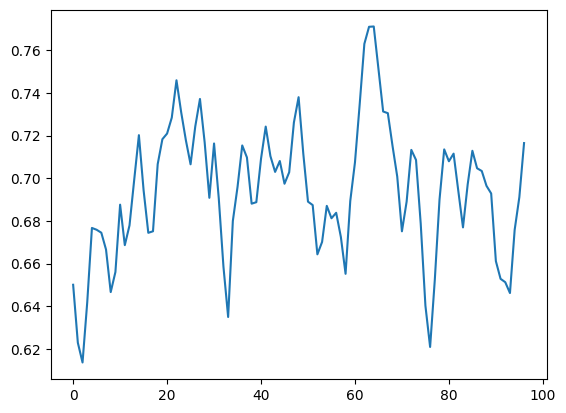

In [122]:
plt.plot([x for x in range(len(means))], means)

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [114]:
seasonal_decompose([x for x in range(len(means))], means)

AttributeError: 'list' object has no attribute 'startswith'

In [131]:
ss = seasonal_decompose(means, period=4)
ss

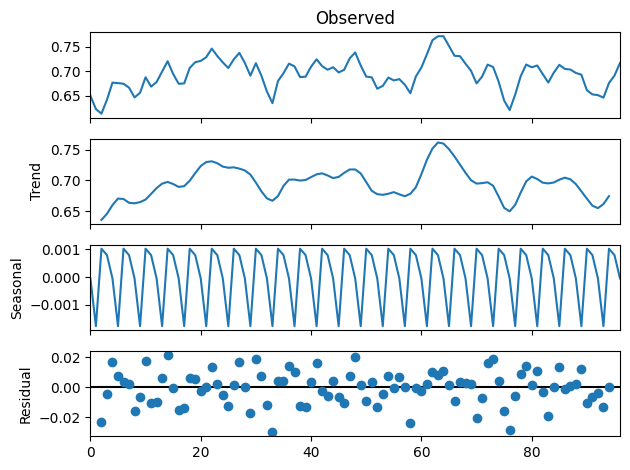

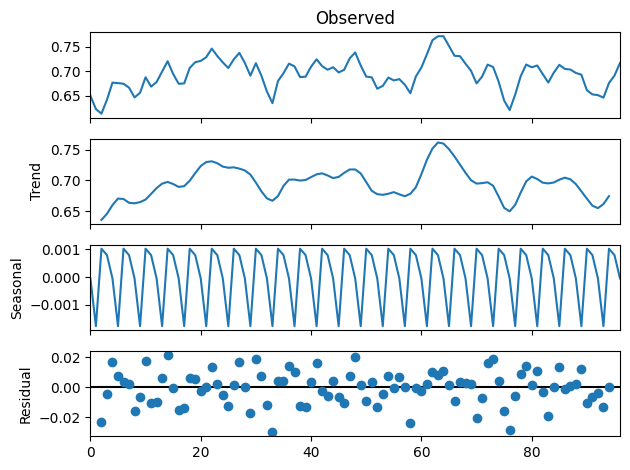

In [133]:
ss.plot()

In [120]:
ss.trend

array([0.6706726, 0.6881538, 0.6897046, 0.6730508, 0.6573638, 0.630539 ,
       0.6297778, 0.6577774, 0.7006828, 0.7201392, 0.6956256, 0.6898108,
       0.7229976, 0.7356396, 0.7251232, 0.7010932, 0.6988882, 0.7060118,
       0.6988392, 0.6930832, 0.69926  , 0.6863304, 0.6869224, 0.7070584,
       0.7114786, 0.7105922, 0.7063138, 0.7001422, 0.6803498, 0.6492484,
       0.6138568, 0.6347592, 0.6828508, 0.7188842, 0.7290908, 0.7277288,
       0.726454 , 0.7394524, 0.7603926, 0.7691154, 0.7463446, 0.7274138,
       0.725251 , 0.7181718, 0.6888166, 0.6879692, 0.7184042, 0.7422338,
       0.7302274, 0.7250912, 0.7178464, 0.7228966, 0.7375416, 0.727413 ,
       0.706231 , 0.7174874, 0.724065 , 0.7393168, 0.7239982, 0.7082972,
       0.7073284, 0.7054794, 0.7048976, 0.7009756, 0.7251264, 0.742342 ,
       0.7348548, 0.7063484, 0.7136416, 0.7206952, 0.7347104, 0.7259592,
       0.720114 , 0.7285416, 0.7199326, 0.7211864, 0.7447538, 0.752087 ,
       0.7298536, 0.6946644, 0.6939826, 0.7121048, 

In [134]:
def trendline(index, data, order=1):
    coeffs = np.polyfit(index, list(data), order)
    slope = coeffs[-2]
    return float(slope)

In [138]:
means_t = means[:5]

In [139]:
resultent=trendline([x for x in range(len(means_t))], means_t)
print(resultent)  

-0.00922304000000005


In [140]:
start = 0
step_size = 5
trends = []
for step in range(0, len(dense[20]) - step_size):
    trends.append(trendline([x for x in range(step_size)], dense[20][step:step+step_size]))

In [141]:
trends

[-0.007663700000000034,
 -0.0004626000000000524,
 -0.025992599999999966,
 -0.019905700000000096,
 0.007909399999999967,
 0.023437299999999942,
 0.03801299999999994,
 0.013220199999999958,
 0.00024099999999995048,
 -0.009700100000000038,
 -0.003673600000000109,
 0.00773479999999994,
 0.003165699999999939,
 -0.0035839000000001476,
 -0.015598000000000046,
 -0.024625100000000035,
 0.0010211999999999088,
 0.013840499999999966,
 0.01714669999999989,
 0.022823299999999935,
 -0.0034224000000000485,
 -0.004550300000000107,
 -0.014823700000000037,
 -0.004752500000000044,
 0.015626599999999956,
 0.02273019999999996,
 0.018844599999999864,
 -0.004185900000000021,
 0.0010480999999999466,
 -0.011081400000000036,
 -0.012851100000000025,
 -0.019303400000000102,
 -0.016973600000000054,
 0.010762299999999983,
 0.012802299999999904,
 0.014337099999999952,
 0.018200099999999983,
 0.007857399999999962,
 0.0070951999999999535,
 -0.00962330000000007,
 -0.010309700000000031,
 0.009777399999999993,
 0.01605489

In [69]:
def read_density_v2(file_name):
    file = open(file_name)
    dense = [[] for _ in range(50)]
    new_step = True
    steps_data = []
    step_data = []
    for line in file:
        line = line.rstrip()
        if len(line) == 0:
            continue
        elif line[0] == "#":
            continue
        if len(line.split()) == 3:
            new_step = True
            if step_data:
                steps_data.append(step_data)
            step_data = []
        else:
            try:
                step_data.append(float(line.split()[3]))
            except IndexError:
                pass
                # print(f"Skipping line due to IndexError: {line}")
            except ValueError:
                pass
                # print(f"Skipping line due to ValueError: {line}")

    file.close()

    return steps_data

In [ ]:
def is_stoppage(file_name):
    return True

In [71]:
np.array(dense)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
dense = read_density_v2("simulation/runs/ROAA_-10G+10T_2024_08_20_02_08_1724119670/321/densities_chunked2.dat")
# dense

In [73]:
dense = np.array(dense)

In [77]:
abs(dense[-1] - dense[-4])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00088449, 0.00263135, 0.0009317 , 0.005595  , 0.006841  ,
       0.022516  , 0.018378  , 0.026977  , 0.013271  , 0.05962   ,
       0.030941  , 0.020628  , 0.01211   , 0.040258  , 0.010657  ,
       0.005863  , 0.004189  , 0.017034  , 0.007852  , 0.02752   ,
       0.041224  , 0.02029   , 0.005322  , 0.0032077 , 0.0113191 ,
       0.00356078, 0.00069551, 0.00043044, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [63]:
dense = [np.array(chunk) for chunk in dense if len(chunk) > 0]
dense

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.

In [56]:
with open("simulation/runs/ROAA_-10G+10T_2024_08_20_02_08_1724119670/321/densities_chunked2.dat") as f:
    data = f.readlines()

In [57]:
data

['# Chunk-averaged data for fix densityRegions2 and group all\n',
 '# Timestep Number-of-chunks Total-count\n',
 '# Chunk Coord1 Ncount density/mass\n',
 '700000 50 6976.000000000001\n',
 '  1 0.01 0 0\n',
 '  2 0.03 0 0\n',
 '  3 0.05 0 0\n',
 '  4 0.07 0 0\n',
 '  5 0.09 0 0\n',
 '  6 0.11 0 0\n',
 '  7 0.13 0 0\n',
 '  8 0.15 0 0\n',
 '  9 0.17 0 0\n',
 '  10 0.19 0.1625 0.000288518\n',
 '  11 0.21 1.45 0.00248438\n',
 '  12 0.23 6.4 0.0111295\n',
 '  13 0.25 24.9 0.043058\n',
 '  14 0.27 85 0.144752\n',
 '  15 0.29 215.287 0.371908\n',
 '  16 0.31 353.35 0.622281\n',
 '  17 0.33 422.812 0.754783\n',
 '  18 0.35 435.6 0.776101\n',
 '  19 0.37 414.788 0.737052\n',
 '  20 0.39 393.875 0.697678\n',
 '  21 0.41 388.738 0.68771\n',
 '  22 0.43 378.075 0.674089\n',
 '  23 0.45 359.438 0.636143\n',
 '  24 0.47 348.075 0.61484\n',
 '  25 0.49 349.913 0.620913\n',
 '  26 0.51 371.975 0.655742\n',
 '  27 0.53 382.9 0.675092\n',
 '  28 0.55 412.312 0.730372\n',
 '  29 0.57 421.762 0.754201\n',